In [1]:
%matplotlib inline

In [2]:
import datetime
import numpy
import pandas

In [3]:
df = pandas.read_csv("uproot-pip-2018-09-05.csv",
                     parse_dates=[0],
                     infer_datetime_format=True)
df.columns, len(df)

(Index(['timestamp', 'country_code', 'file_version', 'details_distro_name',
        'details_distro_version', 'details_system_name',
        'details_system_release', 'details_cpu'],
       dtype='object'), 3324)

In [4]:
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness
df.drop_duplicates(["uniqueness"], inplace=True)
len(df)

551

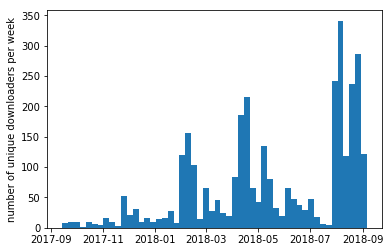

In [43]:
fig = df["timestamp"].hist(bins=365 // 7, grid=False)
fig.set_ylabel("number of unique downloaders per week")
fig.get_figure().savefig("uproot-pip-vsweek.pdf")

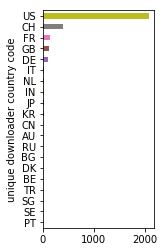

In [44]:
df2 = df.groupby("country_code").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("unique downloader country code")
fig.get_figure().savefig("uproot-pip-vscountry.pdf")

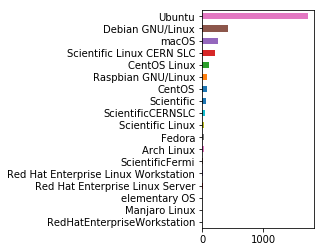

In [45]:
df2 = df.groupby("details_distro_name").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsos.pdf")

In [40]:
df["distro-country"] = df[["details_distro_name", "country_code"]].apply(
    lambda x: "{} ({})".format(x[0], x[1]), axis=1)

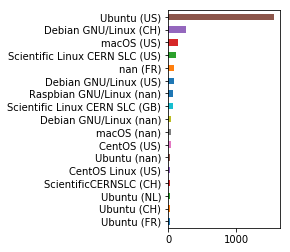

In [46]:
df2 = df.groupby("distro-country").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 20].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsoscountry.pdf")

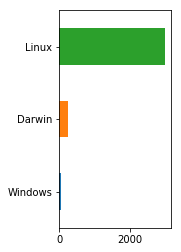

In [47]:
df2 = df.groupby("details_system_name").count().sort_values("timestamp")
fig = df2[df2["timestamp"] > 3].plot.barh(y="timestamp", legend=False, figsize=(2, 4))
fig.set_ylabel("")
fig.get_figure().savefig("uproot-pip-vsosbasic.pdf")

In [9]:
df = pandas.read_csv("uproot-pip-2018-09-05.csv",
                     parse_dates=[0],
                     infer_datetime_format=True)
uniqueness = df[["country_code", "details_distro_name", "details_distro_version",
                 "details_system_name", "details_system_release"]].apply(
    lambda x: ",".join(str(y) for y in x), axis=1)
df["uniqueness"] = uniqueness

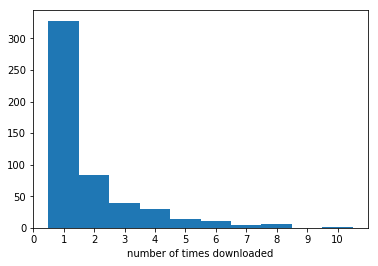

In [48]:
df2 = df.groupby("uniqueness").count().sort_values("timestamp", ascending=False)
fig = df2["timestamp"].hist(bins=numpy.linspace(0.5, 10.5, 11), grid=False)
fig.set_xlabel("number of times downloaded")
fig.set_xticks(range(10 + 1))
fig.get_figure().savefig("uproot-pip-numdownloads.pdf")